<a href="https://colab.research.google.com/github/lalitpandey02/Bamboo-Weekly-by-Reuven-Lerner/blob/main/BW_6_End_of_the_humanities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bamboo Weekly 6 | End of the humanities?

This week, we look into the subjects that US college students are studying — and how that compares with data from the last 50 years. What are they studying more, and what are they studying less?



## **Data and questions**

Our data set set comes from the Digest of Education Statistics, with a table showing the total number of students majoring in each of 30 different areas of study. You can view the table at https://nces.ed.gov/programs/digest/d21/tables/dt21_322.10.asp. Better yet, you can download the file in Excel format from:

https://nces.ed.gov/programs/digest/d21/tables/xls/tabn322.10.xls

Questions for this week are:

1. Retrieve the Excel file with selected years, and turn it into a data frame.

2. Remove the line numbering the surveys. Remove the total. And remove the lines at the bottom, after "Other and not classified".

3. Remove the \n\ markings (for footnotes) from the "Field of study" column

4. Remove newlines and other extraneous whitespace from the "Field of study" column

5. Set the "Field of study" column to be the index.

6. Which majors have had the greatest *increase* since the survey began in 1970-1971?

7. Display the numbers with a comma before every three digits -- so that instead of showing "1000" it shows "1,000"

8. Which majors have had the greatest *decrease* since the survey began in 1970-1971?

9. If we only look at the last 10 years of the study (i.e., starting in 2010-11), do we see similar changes in majors?

10. What percentage decline do we see in all fields containing the word "art," "language," "history," or "culture" in their names in the last 10 years?

In [1]:
# imports
import re
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_colwidth',None)

print("Import complete")

Import complete


### 1. Retrieve the Excel file with selected years, and turn it into a data frame.
The excel sheet is uploaded in the github path
https://github.com/lalitpandey02/Bamboo-Weekly-by-Reuven-Lerner/blob/main/data/BW6_tabn322.10.xls

In [16]:
# url1 = 'https://github.com/lalitpandey02/Bamboo-Weekly-by-Reuven-Lerner/blob/main/data/BW6_tabn322.10.xls'
url = 'https://nces.ed.gov/programs/digest/d21/tables/xls/tabn322.10.xls'

In [17]:
file,_ = urlretrieve(url)

### 2. Remove the line numbering the surveys. Remove the total. And remove the lines at the bottom, after "Other and not classified".

In [25]:
df = pd.read_excel(file, 
                   sheet_name = 'Digest 2021 Table 322.10', 
                   skiprows = [0,2,3], skipfooter=6 # Step2 part is done with these skip parameters
                   )

In [26]:
df.head()

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,Agriculture and natural resources\1\,12674,19402,21886,17191,13363,21757,23766,23497,29203,31629,34304,35953,37028,37827,38782,40334,41373,41848
1,Architecture and related services,5570,9146,9455,9119,9781,8352,8480,9515,9831,9727,9757,9149,9090,8825,8579,8464,8806,9045
2,"Area, ethnic, cultural, gender, and group studies",2579,3577,2887,3021,4776,5633,6160,7878,8955,9228,8850,8275,7783,7840,7720,7717,7733,7767
3,Biological and biomedical sciences,35705,54154,43078,38395,39482,61014,60576,70602,89984,95850,100397,104657,109904,113794,116768,118661,121233,126590
4,Business\2\,115396,143171,200521,236700,249165,226623,263515,318043,365133,367235,360887,358132,363741,371690,381109,386240,390490,387851


In [27]:
print(df.shape)
df.info()

(32, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Field of study  32 non-null     object
 1   1970-71         32 non-null     int64 
 2   1975-76         32 non-null     int64 
 3   1980-81         32 non-null     int64 
 4   1985-86         32 non-null     int64 
 5   1990-91         32 non-null     int64 
 6   1995-96         32 non-null     int64 
 7   2000-01         32 non-null     int64 
 8   2005-06         32 non-null     int64 
 9   2010-11         32 non-null     int64 
 10  2011-12         32 non-null     int64 
 11  2012-13         32 non-null     int64 
 12  2013-14         32 non-null     int64 
 13  2014-15         32 non-null     int64 
 14  2015-16         32 non-null     int64 
 15  2016-17         32 non-null     int64 
 16  2017-18         32 non-null     int64 
 17  2018-19         32 non-null     int64 
 18  201

### 3. Remove the \n\ markings (for footnotes) from the "Field of study" column

In [30]:
# It removes non-alphabetic characters (except spaces) and 
# converts the resulting strings to lowercase, and returns a list of these modified strings.
df["Field of study"] = list(map(lambda text: re.sub(r"[^a-zA-Z ]+"," ",text).lower(), df["Field of study"]))

### 4. Remove newlines and other extraneous whitespace from the "Field of study" column

In [ ]:
# It splits the string into words, removes any extra whitespace between the words, 
# and then joins the words back together into a modified string
df["Field of study"] = list(map(lambda x: " ".join(x.split()), df["Field of study"]))

### 5. Set the "Field of study" column to be the index.

In [34]:
df.set_index("Field of study", inplace=True)

In [35]:
df.head()

,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
Field of study,,,,,,,,,,,,,,,,,,
agriculture and natural resources,12674,19402,21886,17191,13363,21757,23766,23497,29203,31629,34304,35953,37028,37827,38782,40334,41373,41848
architecture and related services,5570,9146,9455,9119,9781,8352,8480,9515,9831,9727,9757,9149,9090,8825,8579,8464,8806,9045
area ethnic cultural gender and group studies,2579,3577,2887,3021,4776,5633,6160,7878,8955,9228,8850,8275,7783,7840,7720,7717,7733,7767
biological and biomedical sciences,35705,54154,43078,38395,39482,61014,60576,70602,89984,95850,100397,104657,109904,113794,116768,118661,121233,126590
business,115396,143171,200521,236700,249165,226623,263515,318043,365133,367235,360887,358132,363741,371690,381109,386240,390490,387851


In [44]:
# Q6 Which majors have had the greatest *increase* since the survey began in 1970-1971?

# My approach is to pivot the table such as the year is the index
def tweak_df_(df: pd.DataFrame) -> pd.DataFrame:
       return (df
              .stack()
              .reset_index()
              .rename(columns={'Field of study':'field_of_study', 'level_1': 'year', 0:'num_enroll'})
              .set_index("year")
              .sort_index(ascending=True))

df_pivot =  tweak_df_(df)
df_pivot

,field_of_study,num_enroll
year,,
1970-71,agriculture and natural resources,12674
1970-71,parks recreation leisure fitness and kinesiology,1621
1970-71,multi interdisciplinary studies,6324
1970-71,area ethnic cultural gender and group studies,2579
1970-71,military technologies and applied sciences,357
...,...,...
2019-20,precision production,39
2019-20,psychology,119968
2019-20,public administration and social services,34356


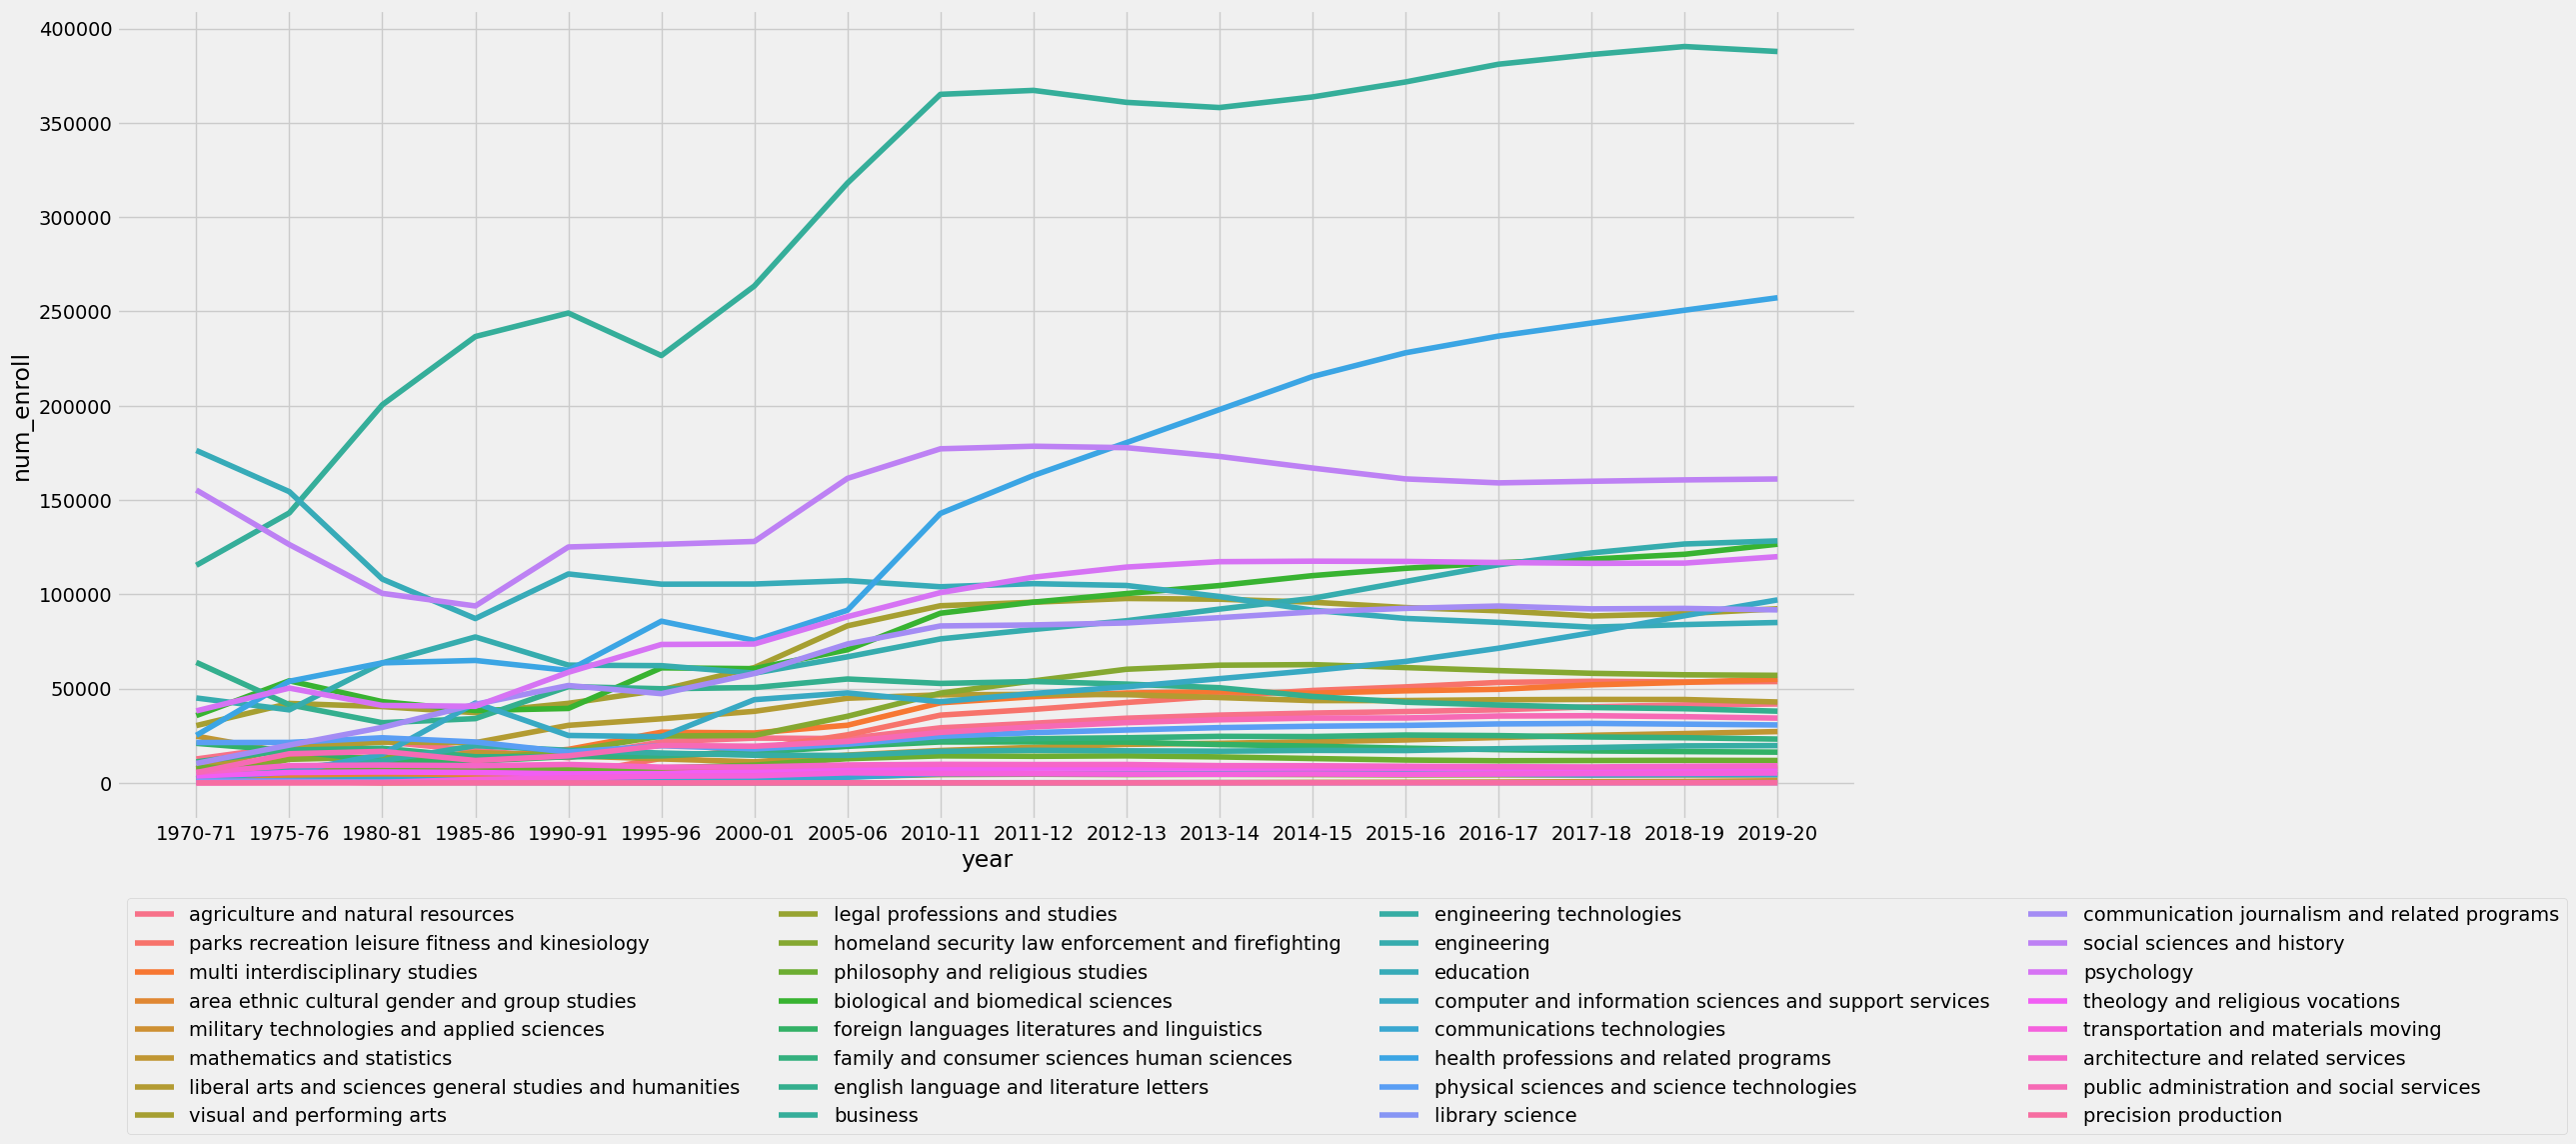

In [45]:
# Q6 Which majors have had the greatest *increase* since the survey began in 1970-1971?

# Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_pivot, 
             x="year", 
             y="num_enroll", 
             hue="field_of_study", 
             legend="auto",
        )
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.4), ncol=4)
plt.ion()
plt.show()